# Student Alcohol Consumption

Martin Škára + Jindřich Buk

Tato semestrální práce se zabývá zpracováním datasetu Student Alcohol Consumption, získaného zde: https://data.world/data-society/student-alcohol-consumption. Tento iPython notebook se skládá z následujících částí: základní popis tohoto datasetu, zpracování a preprocessing dat, vizualizace dat, vytvoření modelů, tuning metaparametrů, výsledky a evaluace. 


//Nechal bych v týhle buňce jen něco na způsob výše, tohle jen tak narychlo osnova

## Osnova - po dokončení smazat

### Popis datasetu

Za mě, minimálně základně DONE (Martin 4.4.2019)

### Zpracování dat (preprocessing)

Asi pro nás spojení těch dvou datasetů, zprůměrování skore alkoholismu v pracovní den s víkendem možná? Plus odstranění některých sloupců. Mělo by být použité pandas.

### Vizualizace dat

Viz příklad co má na webu k předmětu https://www.datacamp.com/community/tutorials/scikit-learn-tutorial-baseball-1

### Modelování

Každej jeden model asi? Musí se použít buď rozdělení dat na testovací/trénovací či crossvalidace. Za mě bych se přikláněl ke crossvalidaci. Nutno použít balíky z sklearn.

### "Tunění" parametrů

Buď zkusit několik konfigurací modelu a srovnat je, či grid search apod.

### Výsledky/Evaluace

výsledky, jak byl modej dobrej apod., plus nějaký kecy třeba že největší vliv na to má matčino povolání 

zobrazit accuracy, pak mě třeba napadá matice záměn nebo co se nám bude chtít


## Popis datasetu

Data byla získána pomocí dotazníku mezi studenty matematiky a portugalštiny na střední škole. Samotný dataset je rozdělený mezi dva menší - jeden obsahuje odpovědi studentů matematiky, druhý odpovědi studentů portugalštiny. Dataset samotný se zajímá různými informacemi o studentovi, ale jeho cílem je zmapovat chování a zázemí studentů a jejich vztah k alkoholu.

### Atributy datasetu

* *school* - Škola, na kterou studenti chodí ('GP' - Gabriel Pereira a 'MS' - Mousinho da Silveira)
* *sex* - Pohlaví studenta ('F' pro ženu, 'M' pro muže)
* *age* - Věk studenta (číslo)
* *adress* - Typ studentova bydliště ('U' - urban (město), 'R' - rural (venkov))
* *famsize* - Počet členů studentovy rodiny v domácnosti ('LT3' - 3 a méně, 'GT3' - více než 3)
* *Pstatus* - Atribut označuje zdali studentovi rodiče žijí spolu či ne ('T' - žijí spolu, 'A' - žijí odděleně)
* *Medu* - vzdělání matky (0 - žádné, 1 - základní vzdělání (4th grade), 2 - základní vzdělání (více než 4th grade), 3 - středoškolské vzdělání, 4 - vyšší vzdělání)
* *Fedu* - obdobný atribut jako Medu, označující vzdělání otce
* *Mjob* - práce matky ('teacher' - učitelka, 'health' - vztahující se ke zdraví a péči, 'services' - státní zaměstnankyně, 'at_home' - v domácnosti, 'other' - jiné)
* *Fjob* - obdobný atribut jako Mjob, označující práci otce
* *reason* - Důvod, proč si student vybral jeho školu ('home' - blízko domova, 'reputation' - reputace školy, 'course' - kvůli předmětům/oboru, 'other' - jiné)
* *guardian* - zákonný zástupce ('mother' - matka, 'father' - otec, 'other' - někdo jiný)
* *traveltime* - jak dlouho student cestuje do školy (1 - do 15 min., 2 - mezi 15 a 30 min., 3 - mezi 30 min. a 1 hodinou, 4 - více než hodinu)
* *studytime* - kolik hodin týdně se student doma učí (1 - méně než 2 hodiny, 2 - 2-5 hodin, 3 - 5-10 hodin, 4 - více než 10 hodin)
* *failures* - kolik předmětů student dokončil neúspěšně
* *schoolsup* - Má extra doučování ve škole
* *famsup* - Má doučování doma od rodiny
* *paid* - Má placené doučování? 
* *activities* - Zdali se student účastní nějakých extra aktivit ve škole (spolky, týmy apod.)
* *nursery* - Chodil student do školky?
* *higher* - Chce jít student dále na vysokou či vyšší odbornou školu?
* *internet* - Má doma student přístup k internetu?
* *romantic* - Má student přítele/přítelkyni?
* *famrel* - Kvalita studentových vztahů v rodině (1 - nejhorší až 5 - nejlepší)
* *freetime* - Kolik volného času má student mimo školu (1 - velmi málo až 5 - velmi mnoho)
* *goout* - Jak často chodí student ven s kamarády (1 - vůbec či téměř ne až 5 - velmi často)
* *Dalc* - Jak moc student konzumuje alkohol v pracovním týdnu (1 - vůbec či téměř ne až 5 - velmi)
* *Walc* - Obdobný atribut jako Dalc, ale označuje konzumaci alkoholu o víkendech
* *health* - studentova zdravotní kondice (1 - velmi špatná až 5 - velmi dobrá)
* *absences* - počet absencí ve škole
* *G1* - známka z předmětu  v prvním pololetí
* *G2* - známka z předmětu  v druhém pololetí
* *G3* - konečná známka z předmětu

Někteří studenti spadají do obou částí datasetu, tj. studovali jak portugalštinu, tak matiku. 

## Zpracování a preprocessing dat

Jelikož, jak bylo psáno v předchozí části tohoto notebooku, se dataset skládá ze dvou menších, je zapotřebí nejdříve tyto dva datasety spojit do jednoho DataFramu. 

In [19]:
# import pandas and InteractiveShell
import pandas as pd

# nahrání obou částí datasetu a spojení jich v jeden 
df_1 = pd.read_csv("student-mat.csv")
df_2 = pd.read_csv("student-por.csv")
df = pd.concat([df_1, df_2], ignore_index=True)


Jak lze vidět, vytvořili jsme jeden velký DataFrame. Jenže jak z popisu dat víme, někteří studenti jsou v něm dvakrát, jelikož studovali oba kurzy (Matiku i Portugalštinu). Je třeba tyto duplikáty odstranit. Na stránce, kde jsme dataset získali je zobrazeno, dle kterých atributů lze poznat stejného studenta. 

In [20]:
# odstranění duplikátů z datasetu a resetování indexů řádků
df = df.drop_duplicates(subset=["school", "sex", "age", "address", "famsize", "Pstatus", "Medu", "Fedu", "Mjob", "Fjob", "reason", "nursery", "internet"])
df = df.reset_index(drop=True)


Duplikáty byly odstraněny. Dále smažeme některé sloupce, dle kterých nechceme klasifikovat studentský alkoholismus. Těmi budou school, G1 a G2 (ze známek ponecháme pouze finální známku z předmětu). 

In [21]:
# odstranění některých sloupců
df = df.drop("school", 1)
df = df.drop("G1", 1)
df = df.drop("G2", 1)

Klasifikovat budeme u studentů jejich alkoholismus, tj. výsledným atributem by mohl být Dalc či Walc. Pro zjednodušení tyto dva atributy zprůměrujeme a zaokhoruhlíme nahoru a tak dostaneme společný atribut jak pro pití v pracovním týdnu, tak o víkendu. Zároveň tak můžeme vypustit atributy Dalc a Walc.

In [22]:
# Vytvoření atributu celkového alkoholismu
df["Alc"] = round((df["Dalc"] + df["Walc"])/2)
df["Alc"] = df["Alc"].astype(int)
df = df.drop("Dalc", 1)
df = df.drop("Walc", 1)

Dále upravíme atributy Medu a Fedu, chceme spojit hodnoty 1 a 2, nebudeme rozlišovat stupně základního vzdělání, zajímá nás pouze jestli má rodič základní vzdělání či střední, žádné nebo vyšší.

Nově tak budou tyto atributy nabývat následujících hodnot:

* *0* - žádné vzdělání
* *1* - základní vzdělání
* *2* - středoškolské vzdělání
* *3* - vyšší vzdělání než středoškolské

In [23]:
df["Medu"] = df["Medu"].apply(lambda x: (x if x<2 else x-1))
df["Fedu"] = df["Fedu"].apply(lambda x: (x if x<2 else x-1))

## Vizualizace dat

V následující části si pro lepší zorientování v datasetu vizuálně zobrazíme některé atributy a jejich vztah ke konzumaci alkoholu.

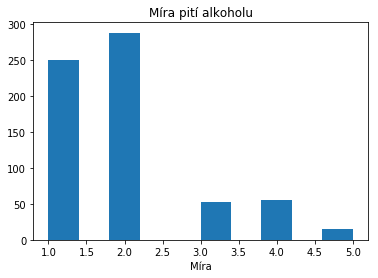

In [26]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.hist(df['Alc'])
plt.xlabel('Míra')
plt.title('Míra pití alkoholu')

plt.show()

In [37]:
df.groupby('sex')['Alc'].mean()

sex
F    1.661538
M    2.338235
Name: Alc, dtype: float64